In [1]:
%load_ext autoreload
%autoreload 2

# Camera-Depth calibration

In [2]:
# import mrob
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

WARNING - 2021-02-18 14:47:31,912 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
WARNING - 2021-02-18 14:47:31,914 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
WARNING - 2021-02-18 14:47:31,915 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
WARNING - 2021-02-18 14:47:31,915 - core - In /home/konstantin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
T

In [3]:
pnp_results = np.load('calib_output/pnp_results.npy', allow_pickle=True).item()

In [4]:
item = pnp_results[list(pnp_results.keys())[0]] # Elements are ordered by an image name
T = item[0] # Transformation of points from uniform grid on chessboard space to camera space
t_scene_points = item[1] # Points from uniform grid on chessboard tranformed by applying T, i.e. T @ p

In [5]:
# pi = mrob.registration.estimate_plane(t_scene_points[0])
# print(pi)

# load pcd from velodyne

In [6]:
# Hardcoded intrinsics and dist_coeffs

intrinsics = np.array([[503.9581604003906, 0.0, 325.4591064453125],
                       [0.0, 504.0079345703125, 340.33404541015625],
                       [0.0, 0.0, 1.0]])
dist_coeff = np.array([5.268435478210449, 3.5621509552001953, -6.14773682627856e-07, -4.438921678229235e-05, 0.1832902431488037, 5.597447872161865, 5.32110071182251, 0.9697896838188171])

# path = "/home/konstantin/personal/CalibrationProject/calib_output/azure_intrinsics.npy"
# data = np.load(path, allow_pickle=True).item()

# intrinsics = data['intrinsics']
# dist_coeff = data['dist_coeff']

In [25]:
from utils.io_utils import get_pointclouds, get_depth, pointcloudify_depths


# To load depth and pointcloudify it
data_path = "/home/konstantin/datasets/bandeja-sequence/2021_02_17/2021-02-17-16-11-22_people/_azure_depth_image_raw"
depths = get_depth(data_path, period=160)

pointclouds = pointcloudify_depths(depths, intrinsics, dist_coeff)

# To load velodyne
# data_path = "/home/konstantin/datasets/bandeja-sequence/2021_02_01_2/2021-02-01-16-17-42/_velodyne_velodyne_points"
# pointclouds = get_pointclouds(data_path, period=4)


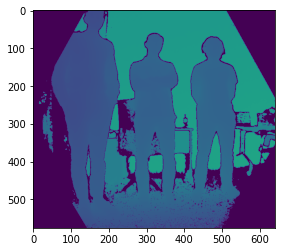

In [26]:
plt.imshow(depths['2258854136289.npy'])

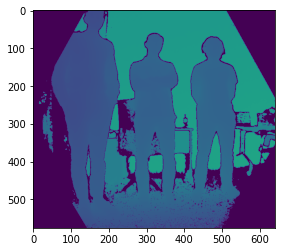

In [28]:
plt.imshow(pointclouds['2258854136289.npy'][:, 2].reshape(576, 640))

In [30]:
import pcl

# pcl.save(pcl.PointCloud(pointclouds['2258854136289.npy'].astype(np.float32)), "calib_output/undist.pcd")
pcl.save(pcl.PointCloud(pointclouds['2258854136289.npy'].astype(np.float32)), "calib_output/dist.pcd")

In [26]:
# A sample for visualization

# def to_open3d_pcd(pcd):
#     o3d_pcd = open3d.geometry.PointCloud()
#     o3d_pcd.points = open3d.utility.Vector3dVector(pcd)
    
#     return o3d_pcd
# open3d.visualization.draw_geometries([to_open3d_pcd(pcd[list(pcd.keys())[-10]])])


# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(segmented_plane[0])
# o3d.visualization.draw_geometries([pcd])
# visualizer = JVisualizer()
# visualizer.add_geometry(pcd)
# visualizer.show()

# Segment PC belonging to the plane

In [7]:
from utils.segment_utils import filter_pointclouds

fpointclouds = filter_pointclouds(pointclouds, (0.0, -1.0, 0.0), (2.5, 1.0, 3.0))

In [ ]:
from utils.segment_utils import segment_pointclouds

s_pointclouds = segment_pointclouds(fpointclouds)

In [1]:
# np.save('calib_output/check.npy', s_pointclouds)

# Camera to Lidar calibration